## Pablo Valdunciel Sánchez 
## 14th October, 2019
Evaluate the how the number of clusters, k, and the initial centers affect the Kmeans algorithm.


# Imports

In [13]:
import numpy as np 
import matplotlib.pyplot as plt

from sklearn.cluster import KMeans 
from sklearn.preprocessing import MinMaxScaler 
from sklearn.model_selection import StratifiedKFold
from sklearn.datasets import load_iris
from sklearn.metrics import accuracy_score

from scipy.stats import mode

# Data preparation

In [14]:
# Obtener datos
dataset = load_iris() 
X = dataset["data"]
Y = dataset["target"]

# Normalizar atributos 
X = MinMaxScaler().fit_transform(X)

print(X.shape, Y.shape)

(150, 4) (150,)


# Evaluate the variation of the number of clusters, K

In [15]:
def get_indexes(target, myList):
    """Returns the indexes of where the list 'myList' 
       contains the element 'target'"""
    for i in range(len(myList)):
        if myList[i] == target:
            yield i

In [16]:
FOLDS = 10
MIN_CLUSTERS = 3 
MAX_CLUSTERS = 12 
NUM_CLUSTERS = MAX_CLUSTERS - MIN_CLUSTERS + 1 

skf = StratifiedKFold(n_splits=FOLDS, shuffle=True, random_state=0) 
hit_rates = [0]*NUM_CLUSTERS

for k in range(MIN_CLUSTERS, MAX_CLUSTERS+1):
    hit_rate = 0
    for train_index, test_index in skf.split(X, Y):
        X_train, X_test = X[train_index], X[test_index]
        Y_train, Y_test = Y[train_index], Y[test_index]        
        mode_values = [None] * k
        
        kmeans = KMeans(n_clusters=k, random_state=1).fit(X_train)
        test_prediction = kmeans.predict(X_test)        
        
        for cluster in range(k):
            cluster_indexes = list(get_indexes(cluster, test_prediction))
            cluster_labels = Y_test[cluster_indexes]
            mode_values[cluster] = mode(cluster_labels)[0]
        
        t_test_prediction = list(map(lambda x : mode_values[x], test_prediction))
        hit_rate += accuracy_score(t_test_prediction, Y_test)
        
    hit_rates[k-MIN_CLUSTERS] = hit_rate / skf.get_n_splits()
        

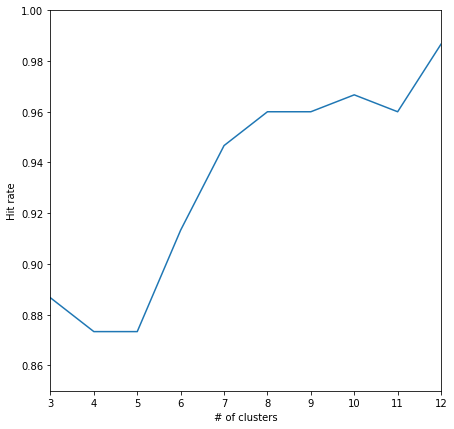

In [17]:
fig = plt.figure(figsize=(7, 7))
x = range(MIN_CLUSTERS, MAX_CLUSTERS+1)

plt.plot(x, hit_rates)
plt.axis([MIN_CLUSTERS, MAX_CLUSTERS,0.85,1.0])
plt.ylabel('Hit rate')
plt.xlabel('# of clusters')
plt.show()

# Evaluate the variation in the initial centers

In [18]:
FOLDS = 10
NUM_CLUSTERS = 10
MIN_RAND_STATE = 0
MAX_RAND_STATE = 9

skf = StratifiedKFold(n_splits=FOLDS, shuffle=True, random_state=0) 
hit_rates = [None]*NUM_CLUSTERS

for rs in range(MIN_RAND_STATE, MAX_RAND_STATE + 1): 
    hit_rate = 0
    for train_index, test_index in skf.split(X, Y):
        X_train, X_test = X[train_index], X[test_index]
        Y_train, Y_test = Y[train_index], Y[test_index]        
        mode_values = [None] * NUM_CLUSTERS
        
        kmeans = KMeans(n_clusters=NUM_CLUSTERS, random_state=rs).fit(X_train)
        test_prediction = kmeans.predict(X_test)        
        
        for cluster in range(NUM_CLUSTERS):
            cluster_indexes = list(get_indexes(cluster, test_prediction))
            cluster_labels = Y_test[cluster_indexes]
            mode_values[cluster] = mode(cluster_labels)[0]
        
        t_test_prediction = list(map(lambda x : mode_values[x], test_prediction))
        hit_rate += accuracy_score(t_test_prediction, Y_test)
        
    hit_rates[rs] = hit_rate / skf.get_n_splits()
        

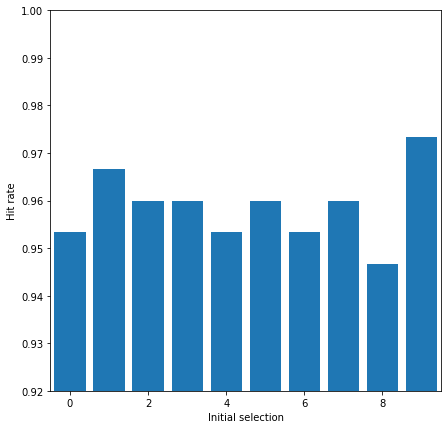

In [19]:
fig = plt.figure(figsize=(7, 7))

plt.bar(range(10), hit_rates)
plt.axis([-0.5, 9.5,0.92,1.0])
plt.ylabel('Hit rate')
plt.xlabel('Initial selection')
plt.show()